Advanced Operating Systems Project

Cryptocurrency data analysis and prediction for short term investment

18MCMI05, Delton M Antony, Mtech Artificial Intelligence

Abstract:

There are well over a thousand cryptocurrencies in existence today. Investing in cryptocurrencies can lead to substantial profits or crippling losses for the investor. Out of these currencies, which one is the best to invest in? What are the trends in the major cryptocurrencies that can be made visible to the investor? These are the questions that will be answered in the project by using a dataset that logged the major cryptocurrencies throughout these last few years. After the descriptive data analysis, we will try to predict the future values of the major cryptocurrencies using predictive analytics techniques using machine learning to find out if it is possible to make the most optimal investment. This project will try to check if machine learning can predict the future of the ever unpredictable blockchain.

Tech Stack: ipython, anaconda, jupyter, sklearn, spyder

Exploratory Data Analysis:
There are more than a thousand cryptocurrencies in existence today. In this project, I will do an EDA and Predictive analysis for three cryptocurrencies namely Bitcoin, Ethereum and Litecoin.

Loading the dataset

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('crypto-markets.csv', parse_dates=['date'],index_col='date')

Exploring the data

In [2]:
data.head(10)

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
2013-05-03,bitcoin,BTC,Bitcoin,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03
2013-05-04,bitcoin,BTC,Bitcoin,1,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50
2013-05-05,bitcoin,BTC,Bitcoin,1,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66
2013-05-06,bitcoin,BTC,Bitcoin,1,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 702166 entries, 2013-04-28 to 2018-01-06
Data columns (total 12 columns):
slug           702166 non-null object
symbol         702166 non-null object
name           702166 non-null object
ranknow        702166 non-null int64
open           702166 non-null float64
high           702166 non-null float64
low            702166 non-null float64
close          702166 non-null float64
volume         702166 non-null int64
market         702166 non-null int64
close_ratio    702166 non-null float64
spread         702166 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 69.6+ MB


This data file is for format .csv and is 70 megabytes in size. It contains the info about the three cryptocurrencies along with others like Ripple, Ethereum classic, ZCash etc. We are only concerned with Bitcoin, Ethereum and Litecoin. Hence, we will filter them out with the following code.

In [4]:
concerned_currencies = ['BTC', 'ETH', 'LTC']
data = data[data.symbol.isin(concerned_currencies)]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2013-04-28 to 2018-02-21
Data columns (total 12 columns):
slug           4452 non-null object
symbol         4452 non-null object
name           4452 non-null object
ranknow        4452 non-null int64
open           4452 non-null float64
high           4452 non-null float64
low            4452 non-null float64
close          4452 non-null float64
volume         4452 non-null int64
market         4452 non-null int64
close_ratio    4452 non-null float64
spread         4452 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 452.2+ KB


Out of 702166 records, we got the 4452 records that contain information about Bitcoin, Ethereum and Litecoin.
Let us see how many records exist for each.

In [6]:
data.name.value_counts()

Litecoin    1761
Bitcoin     1761
Ethereum     930
Name: name, dtype: int64

Preprocessing:

Checking missing values:

In [7]:
data.isnull().sum()

slug           0
symbol         0
name           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

Confirmed that there are no missing values present in the dataset.

Checking if there is any record that is duplicated.

In [8]:
data.duplicated().sum()

0

There are no duplicate records.

Descriptive Analytics Report

Separating the dataset into respective sets for BTC, ETH and LTC

In [9]:
bitcoin = data[data['symbol']=='BTC']
ethereum = data[data['symbol']=='ETH']
litecoin = data[data['symbol']=='LTC']

Now we need to plot graphs for EDA. We will be using matplotlib and seaborn for that.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

Plotting the market cap of the three currencies.

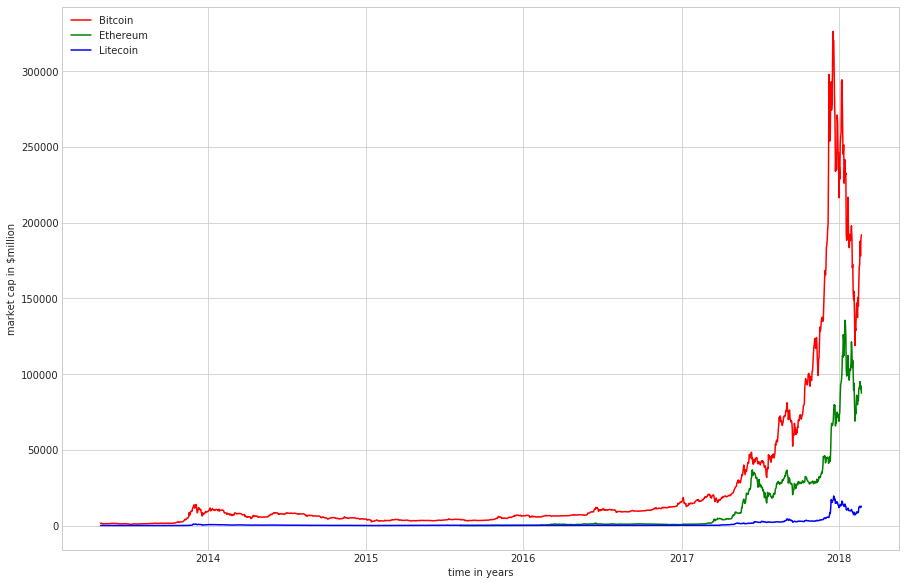

In [11]:
plt.figure(figsize=(15,10))
(bitcoin['market']/1000000).plot(color='red', label='Bitcoin')
(ethereum['market']/1000000).plot(color='green', label='Ethereum')
(litecoin['market']/1000000).plot(color='blue', label='Litecoin')

plt.legend()
plt.xlabel('time in years')
plt.ylabel('market cap in $million')
plt.show()

One important thing I noticed is that a direct correlation can be seen forming between the data. Cryptocurrencies became all the rage after 2017.

Transaction Volume: One direct result of the number of people that participate in the blockchain is that the value of the cryptocurrency is directly dependent on that. Hence it is important to include Transaction Volume in the data as it can directly influence the price of that currency.

Let us plot it as a funciton of time.

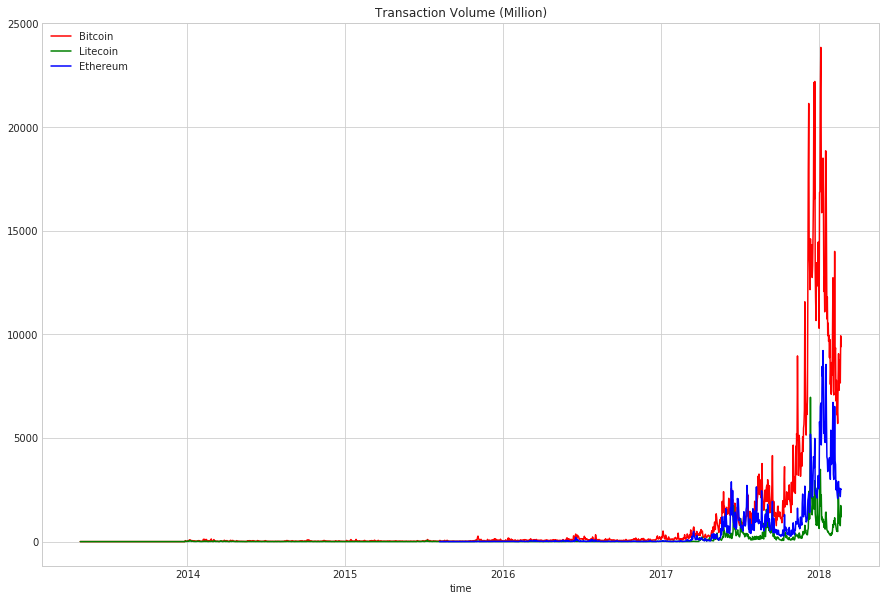

In [12]:
plt.figure(figsize=(15,10))
(bitcoin['volume']/1000000).plot(color='red', label='Bitcoin')
(litecoin['volume']/1000000).plot(color='green', label='Litecoin')
(ethereum['volume']/1000000).plot(color='blue', label='Ethereum')

plt.legend()
plt.xlabel('time')
plt.title('Transaction Volume (Million)')
plt.show()

It is evident that nothing much happened in this area until 2017. Before that people showed some interest in bitcoin, but that was it. So, let us only consider those records that were made from 2017.

In [13]:
data = data['2017-01-01':]
data.head(10)

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68
2017-01-06,bitcoin,BTC,Bitcoin,1,1014.24,1046.81,883.94,902.20,351876000,16314100000,0.1121,162.87
2017-01-07,bitcoin,BTC,Bitcoin,1,903.49,908.59,823.56,908.59,279550000,14534400000,1.0000,85.03
2017-01-08,bitcoin,BTC,Bitcoin,1,908.17,942.72,887.25,911.20,158715000,14611400000,0.4318,55.47
2017-01-09,bitcoin,BTC,Bitcoin,1,913.24,913.69,879.81,902.83,141877000,14694900000,0.6795,33.88


The price of the cryptocurrencies will fluctuate frequently. Let's find the difference between opening and closing prices and make a new feature in the dataset as oc_diff.

In [14]:
data['oc_diff']=data['close']-data['open']
data.head(10)

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread,oc_diff
date,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,34.67
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,23.13
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,22.24
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,110.33
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,-143.35
2017-01-06,bitcoin,BTC,Bitcoin,1,1014.24,1046.81,883.94,902.20,351876000,16314100000,0.1121,162.87,-112.04
2017-01-07,bitcoin,BTC,Bitcoin,1,903.49,908.59,823.56,908.59,279550000,14534400000,1.0000,85.03,5.10
2017-01-08,bitcoin,BTC,Bitcoin,1,908.17,942.72,887.25,911.20,158715000,14611400000,0.4318,55.47,3.03
2017-01-09,bitcoin,BTC,Bitcoin,1,913.24,913.69,879.81,902.83,141877000,14694900000,0.6795,33.88,-10.41


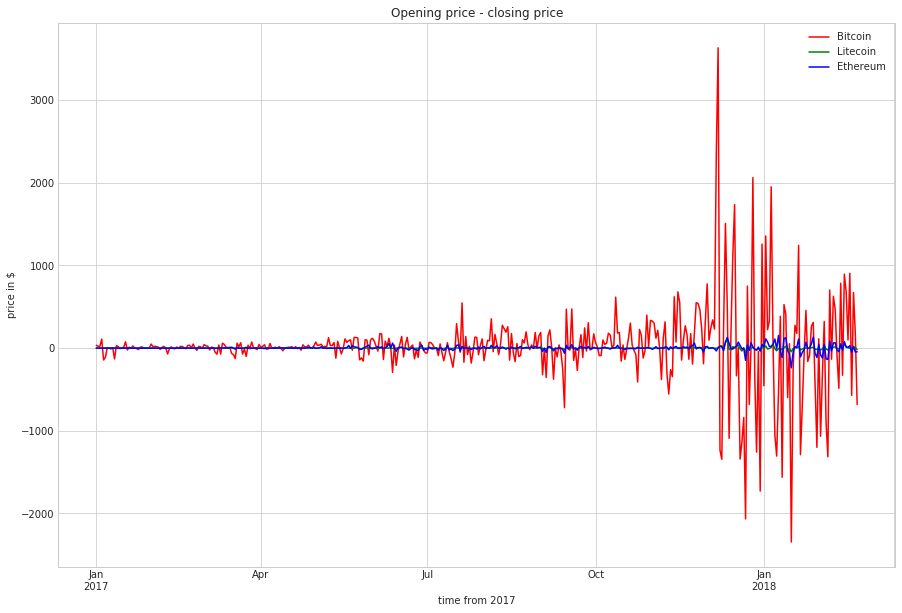

In [15]:
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ethereum = data[data['symbol']=='ETH']

plt.figure(figsize=(15,10))
(bitcoin['oc_diff']).plot(color='red', label='Bitcoin')
(litecoin['oc_diff']).plot(color='green', label='Litecoin')
(ethereum['oc_diff']).plot(color='blue', label='Ethereum')

plt.xlabel('time from 2017')
plt.ylabel('price in $')
plt.title('Opening price - closing price')
plt.legend()
plt.show()

We can see that the difference is the highest in Bitcoin while the other currencies are stable. This may be because the value of those currencies are also proportionately less.

The average difference can be summarized as below.

In [16]:
ave_diff={'bitcoin':[(bitcoin['oc_diff']).mean()],
          'litecoin':[(litecoin['oc_diff']).mean()],
          'ethereum':[(ethereum['oc_diff']).mean()]}
pd.DataFrame(ave_diff, index=['avg.diff'])

,bitcoin,litecoin,ethereum
avg.diff,22.604724,0.450552,1.86199


Difference between the daily highest and the daily lowest price is given by the feature "spread".
Let us plot it with respect to time.

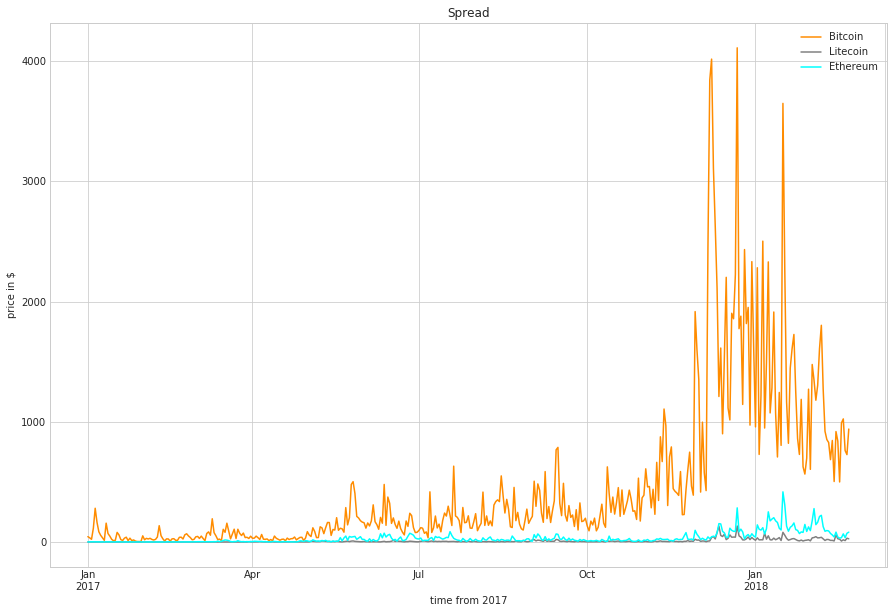

In [17]:
plt.figure(figsize=(15,10))
(bitcoin['spread']).plot(color='darkorange', label='Bitcoin')
(litecoin['spread']).plot(color='grey', label='Litecoin')
(ethereum['spread']).plot(color='cyan', label='Ethereum')

plt.xlabel('time from 2017')
plt.ylabel('price in $')
plt.title('Spread')
plt.legend()
plt.show()

The prices difference from high to low, as seen in the case of opening and closing, is also high in Bitcoin. A similar trend is followed closely by Ethereum and Litecoin.

Let us summarize the average spread.

In [18]:
ave_spread={'bitcoin':[(bitcoin['spread']).mean()],
          'litecoin':[(litecoin['spread']).mean()],
          'ethereum':[(ethereum['spread']).mean()]}
pd.DataFrame(ave_spread, index=['avg.spread'])

,bitcoin,litecoin,ethereum
avg.spread,440.968441,8.522134,33.442902


Lets make a daily average price column for the dataset.
Here, I define average as (open+close+high+low)/4

In [19]:
data['daily_avg'] = (data['open'] + data['high'] + data['low'] + data['close']) / 4
data.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread,oc_diff,daily_avg
date,,,,,,,,,,,,,,
2017-01-01,bitcoin,BTC,Bitcoin,1,963.66,1003.08,958.70,998.33,147775000,15491200000,0.8930,44.38,34.67,980.9425
2017-01-02,bitcoin,BTC,Bitcoin,1,998.62,1031.39,996.70,1021.75,222185000,16055100000,0.7221,34.69,23.13,1012.1150
2017-01-03,bitcoin,BTC,Bitcoin,1,1021.60,1044.08,1021.60,1043.84,185168000,16426600000,0.9893,22.48,22.24,1032.7800
2017-01-04,bitcoin,BTC,Bitcoin,1,1044.40,1159.42,1044.40,1154.73,344946000,16795400000,0.9592,115.02,110.33,1100.7375
2017-01-05,bitcoin,BTC,Bitcoin,1,1156.73,1191.10,910.42,1013.38,510199000,18604000000,0.3668,280.68,-143.35,1067.9075


Doing the same for the separate bitcoin, litecoin and ethereum datasets

In [20]:
bitcoin = data[data['symbol']=='BTC']
litecoin = data[data['symbol']=='LTC']
ethereum = data[data['symbol']=='ETH']

Plotting the daily average price

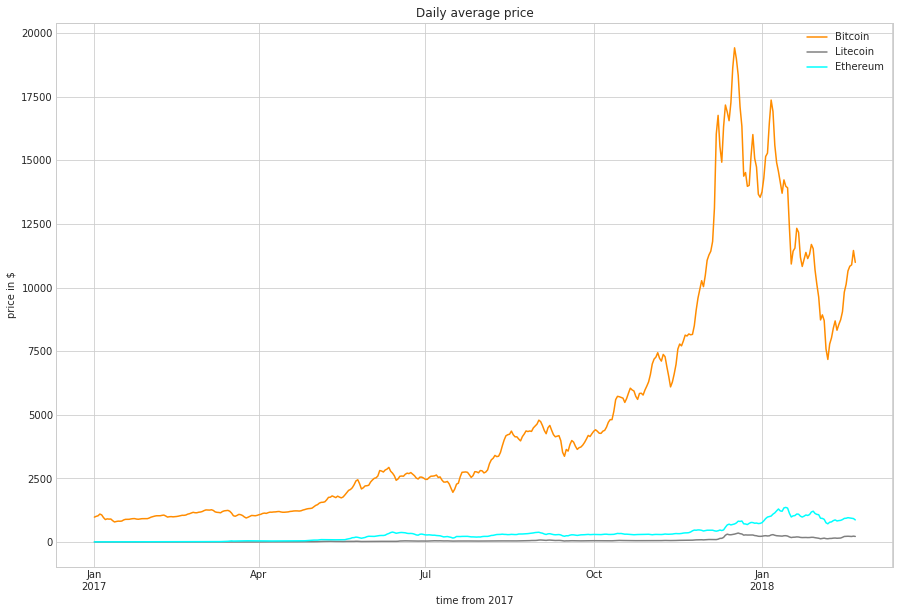

In [21]:
plt.figure(figsize=(15,10))
(bitcoin['daily_avg']).plot(color='darkorange', label='Bitcoin')
(litecoin['daily_avg']).plot(color='grey', label='Litecoin')
(ethereum['daily_avg']).plot(color='cyan', label='Ethereum')

plt.xlabel('time from 2017')
plt.ylabel('price in $')
plt.title('Daily average price')
plt.legend()
plt.show()

Plotting individual daily high, low, open and close prices

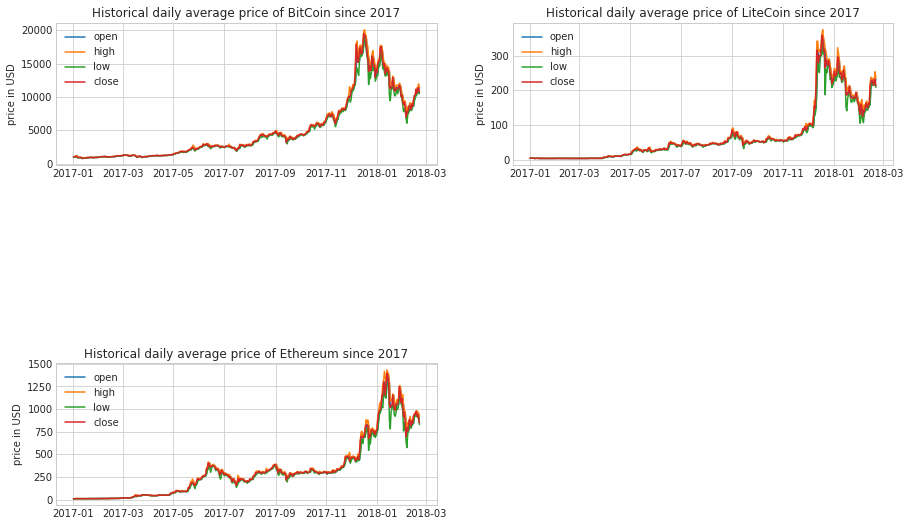

In [22]:
plt.figure(figsize=(15, 12))

plt.subplot(4,2,1)
plt.plot(bitcoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,2)
plt.plot(litecoin[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since 2017')
plt.legend(['open','high','low','close'])

plt.subplot(4,2,5)
plt.plot(ethereum[['open','high','low','close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['open','high','low','close'])
plt.show()

What we can infer from the above is that the trend is similar in shape, but not in scale. The pattern of bitcoin is closely followed by ethereum and litecoin in a much smaller scale ie price.

This hypothesis can be verified by using a correlation matrix. If there is a high positive correlation, then we can conclude that bitcoin price influences the other cryptocurrencies.

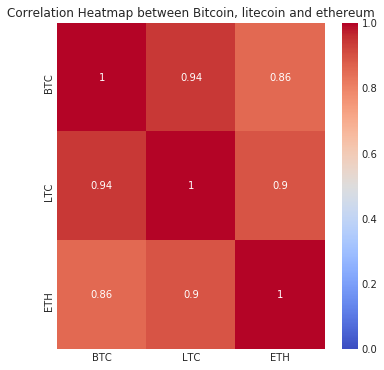

In [32]:
btc = bitcoin[['close']]
btc.columns=['BTC'] # did this to label the legend of graph
ltc = litecoin[['close']]
ltc.columns=['LTC']
eth = ethereum[['close']]
eth.columns=['ETH']
close = pd.concat([btc,ltc,eth], axis=1)
plt.figure(figsize=(6,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin, litecoin and ethereum')
plt.show()

We can see that there is a very high positive correlation. This proves the above hypothesis.

Now the mosts important factor ie the Returns Ratio. Let us see for the three cryptocurrencies.

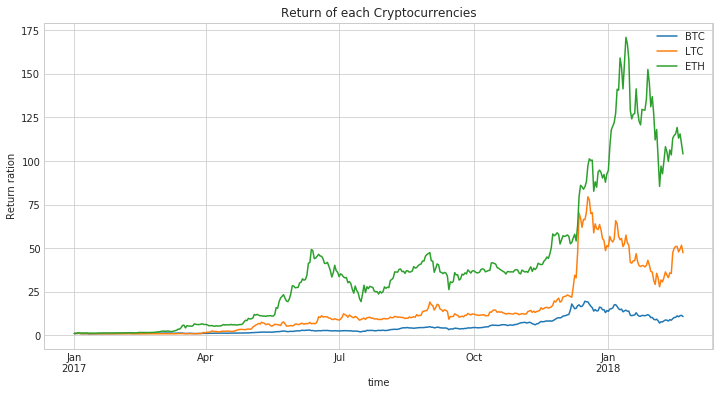

In [33]:
returns = close.apply(lambda x: x/x[0])
returns.plot(figsize=(12,6))
plt.ylabel('Return ration')
plt.xlabel('time')
plt.title('Return of each Cryptocurrencies')
plt.show()

From this, you can see that Bitcoin became fairly stable since 2017 while Ethereum and Litecoin gives the highest return ratio.
From this, it is seen that investing in Ethereum can have a good ROI in the long term despite the frequent fluctuations and casper.